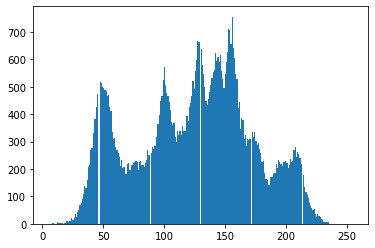

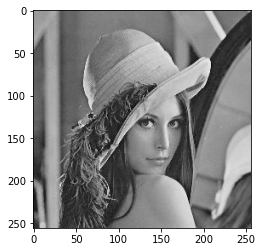

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

path = "F:/4.1/CSE 4128 Image Lab/lab3/pics/lena.jpg"

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = np.asarray(img)

flat = img.flatten()

plt.hist(flat, bins=256)
plt.show()
plt.imshow(img, "gray")
plt.show()

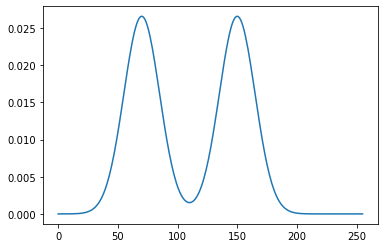

In [5]:
# For Gaussian function 1 let mean = 30, std = 3
miu1 = 70
std1 = 15

miu2 = 150
std2 = 15

def generate_gaussian(x, miu, std):
    weight = 1/np.sqrt(2*3.14*std**2)
    neumerator = (x-miu)**2
    denominator = 2*std**2
    val = weight*math.exp(-(neumerator/denominator))
    return val

gauss1 = []
for x in range(256):
    gauss1.append(generate_gaussian(x, miu1, std1))

gauss2 = []
for x in range(256):
    gauss2.append(generate_gaussian(x, miu2, std2))

gauss1 = np.asarray(gauss1)
gauss2 = np.asarray(gauss2)

gauss3 = gauss1 + gauss2

plt.plot(gauss3)
plt.show()

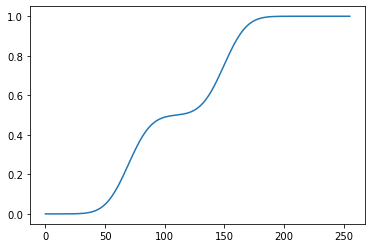

In [6]:
cdf = np.zeros(256)
g3_sum = gauss3.sum()
g3_pdf = np.zeros(256)
g3_pdf = gauss3/g3_sum

# g3_cum = np.zeros(256)
cdf[0] = g3_pdf[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1]+g3_pdf[i]

# cdf[0] = gauss3[0]
# for i in range(1, 256):
#     cdf[i] = cdf[i-1]+gauss3[i]

# cdf = cdf/2
plt.plot(cdf)
plt.show()

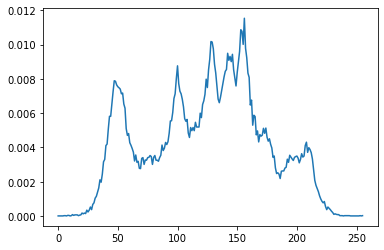

In [7]:
hist = np.zeros(256)

for v in flat:
    hist[v]+=1
hist = hist/(img.shape[0]*img.shape[1])
plt.plot(hist)
plt.show()

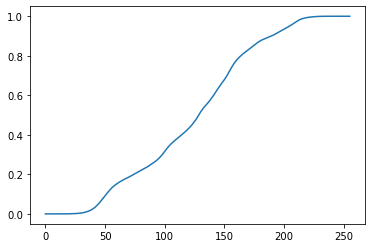

In [8]:
cdfimg = np.zeros(256)

cdfimg[0] = hist[0]
for i in range(256):
    cdfimg[i] = cdfimg[i-1]+hist[i]

plt.plot(cdfimg)
plt.show()

In [9]:
def findclosest(cval, low, high):
    
    mini = 1000
    for i in range(len(cdf)):
        if cdf[i] == cval:
            return i
        elif abs(cval-cdf[i])<mini:
            result = i
            mini = abs(cval-cdf[i])
        elif abs(cval-cdf[i])>mini:
            break
    return result

out = np.zeros(img.shape)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]
        cval = cdfimg[intensity]
        closeval = findclosest(cval, 0, 255)
        out[i, j] = closeval

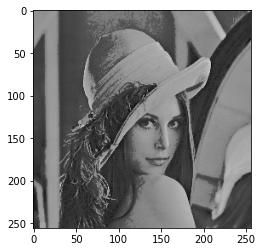

In [10]:
plt.imshow(out, "gray")
plt.show()

[154. 152. 150. ...  76.  79.  80.]


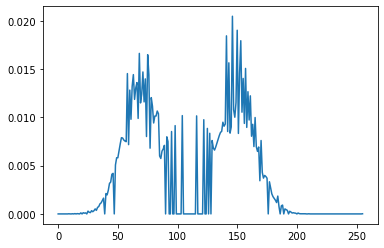

In [11]:
oflat = out.flatten()
print(oflat)
hist1 = np.zeros(256)

for v in oflat:
    hist1[int(v)]+=1
hist1 = hist1/(out.shape[0]*out.shape[1])
plt.plot(hist1)
plt.show()

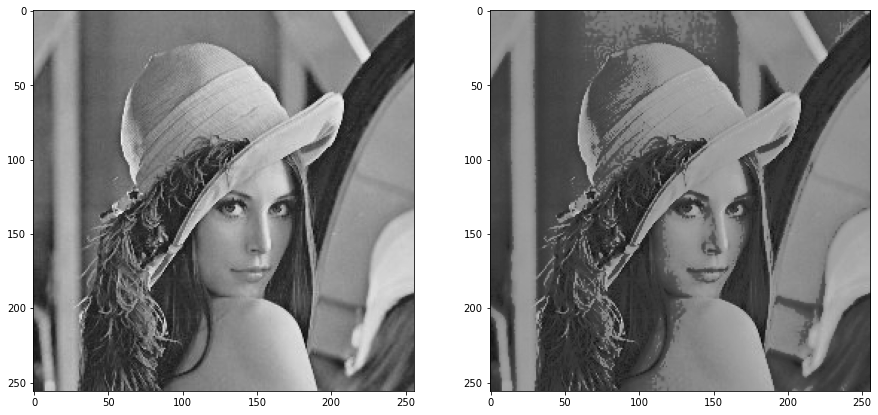

In [12]:
fig = plt.figure(figsize=(15, 15))
    
fig.add_subplot(1,2,1)
plt.imshow(img, 'gray')
fig.add_subplot(1,2,2)
plt.imshow(out, 'gray')
plt.show()

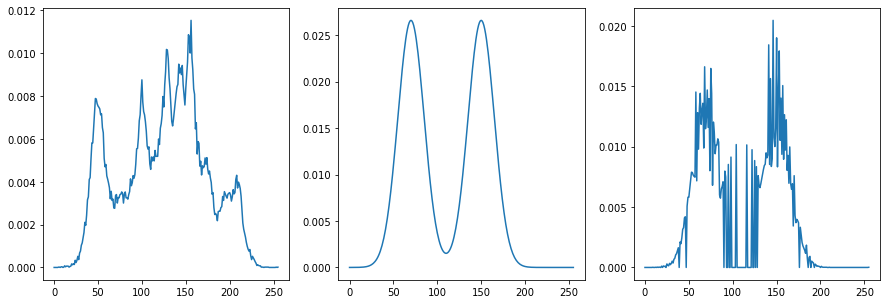

In [13]:
fig = plt.figure(figsize=(15, 5))
    
fig.add_subplot(1,3,1)
plt.plot(hist)
fig.add_subplot(1,3,2)
plt.plot(gauss3)
fig.add_subplot(1,3,3)
plt.plot(hist1)
plt.show()